In [15]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime
from pprint import pprint

#Crimes_2012-2015
#https://catalog.data.gov/dataset/crimes-2012-2015

# 935259 Rows
# 2012 - 2015
#Header = Date.Rptd, DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,
#            LOCATION,Cross.Street,Location.1
#AREA.NAME = districten

years =[]

#import dataset (pas locatie aan)
#filter header eruit
crime_data = (sc.textFile('../data/crimesLA/Crimes_2012-2015.csv').filter(lambda line: 'DATE.OCC' not in line))

year12 = crime_data.filter(lambda line: '/2012'  in line)
year13 = crime_data.filter(lambda line: '/2013'  in line)
year14 = crime_data.filter(lambda line: '/2014'  in line)
year15 = crime_data.filter(lambda line: '/2015'  in line)

years.append(year12)
years.append(year13)
years.append(year14)
years.append(year15)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# x_axis = [ for i in range(12, 16, 1)]

x_axis = range(2012,2016)
y_axis = []

for i in range(0, 4):
    y_axis.append(years[i].count())
    print years[i].count()

238117
239731
240449
228443


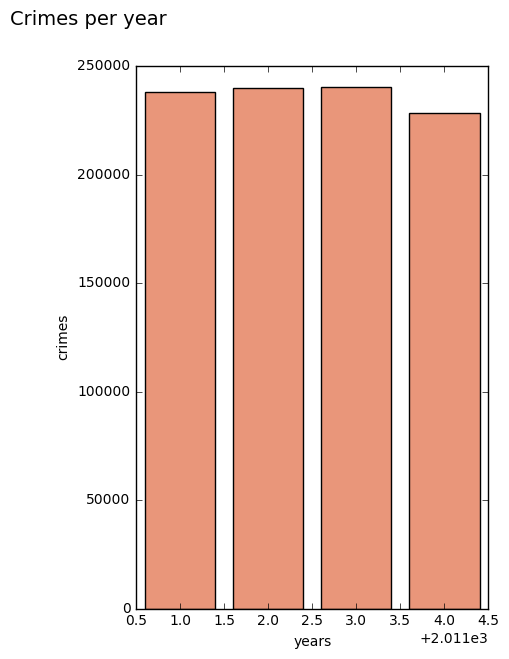

In [17]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Crimes per year', fontsize=14)
ax = fig.add_subplot(122)
ax.set_xlabel('years')
ax.set_ylabel('crimes')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')
plt.show()

In [18]:
personCrimesid = [952,231,230,624,622,623,860,840,870,235,627,813,237,922,812,110,930,943,753,886,434,111,830,940,236,626,
                763,250,251,821,845,810,815,850,910,882,884,435,820,933,625,888,756,113,121,932,762]
propertyCrimesid = [648,480,487,942,949,662,664,310,330,654,653,660,951,950,345,444,668,670,349,347,924,331,420,354,440,473,474,350,341,647,470,471,740,745,510,442,
                    343,430,431,446,352,805,661,210,351,931]
inchoateCrimesid = [220,485,761,666,320,410,944,954,445,421,450,441,475,520,443,920,452,436,451,122,928,930]
statutoryCrimesid = [948,755,903,880,649,652,651,433,865,353,439,900,901,902,806,437,438,956,946,814,822]
traficCrimesid = [997,890]

def parse_interaction(line):
    elems = line.split(",")
    crimeId = int(elems[7])
    if crimeId in personCrimesid:
        return ("personCrimes", elems)
    elif crimeId in propertyCrimesid:
        return ("propertyCrimes", elems)
    elif crimeId in inchoateCrimesid:
        return ("inchoateCrimes", elems)
    elif crimeId in statutoryCrimesid:
        return ("statutoryCrimes", elems)
    elif crimeId in traficCrimesid:
        return ("traficCrimes", elems)
    else:
        return ("None", None)

key_crimes_data = year12.map(parse_interaction)

# person_crimes_data = key_crimes_data.filter(lambda x: x[0]=="personCrimes")
# print person_crimes_data.take(1)
# Geeft alle data weer van personCrimes
# [('personCrimes', [u'12/31/2012', u'120101612', u'12/31/2012', u'2250', u'1', u'Central', u'156', u'230', u'"ASSAULT WITH DEADLY WEAPON', u' AGGRAVATED ASSAULT"', u'AA', u'Adult Arrest', u' WALL ST', u'5TH ST', u'"(34.0449', u' -118.2458)"'])]

# print key_crimes_data.countByKey()
# Geeft:
# defaultdict(<type 'int'>, {'traficCrimes': 37835, 'propertyCrimes': 128216, 'inchoateCrimes': 4740, 'personCrimes': 55543, 'statutoryCrimes': 11783})

In [21]:
# Filters person crimes and get time
person_crimes_data = key_crimes_data.filter(lambda x: x[0]=="personCrimes")
person_crimes_data = person_crimes_data.map(lambda x: x[1][3])
print person_crimes_data.collect()
# print person_crimes_data.collect()[0][1][3]

[u'2250', u'1830', u'755', u'1550', u'800', u'1225', u'1100', u'130', u'130', u'1820', u'1020', u'1145', u'700', u'2200', u'1900', u'1745', u'2130', u'1520', u'1115', u'1640', u'930', u'1615', u'1415', u'1415', u'200', u'130', u'225', u'700', u'1140', u'700', u'600', u'145', u'1020', u'1145', u'1145', u'1505', u'1805', u'640', u'1630', u'1725', u'1700', u'900', u'1050', u'330', u'1050', u'415', u'1430', u'800', u'230', u'2245', u'1710', u'1515', u'2300', u'2245', u'1045', u'1730', u'1350', u'2000', u'2325', u'1430', u'2100', u'1930', u'2200', u'2345', u'2135', u'2200', u'1920', u'1215', u'2230', u'2330', u'2055', u'1000', u'1130', u'2030', u'1200', u'2320', u'2225', u'2320', u'2230', u'2230', u'1900', u'1800', u'2215', u'1730', u'1530', u'5', u'2130', u'2200', u'2105', u'1900', u'1800', u'1215', u'1215', u'1035', u'2100', u'2315', u'2030', u'2230', u'1445', u'2259', u'2259', u'2100', u'1', u'1515', u'1950', u'1815', u'2000', u'2000', u'1935', u'1500', u'2325', u'2045', u'100', u'2255',

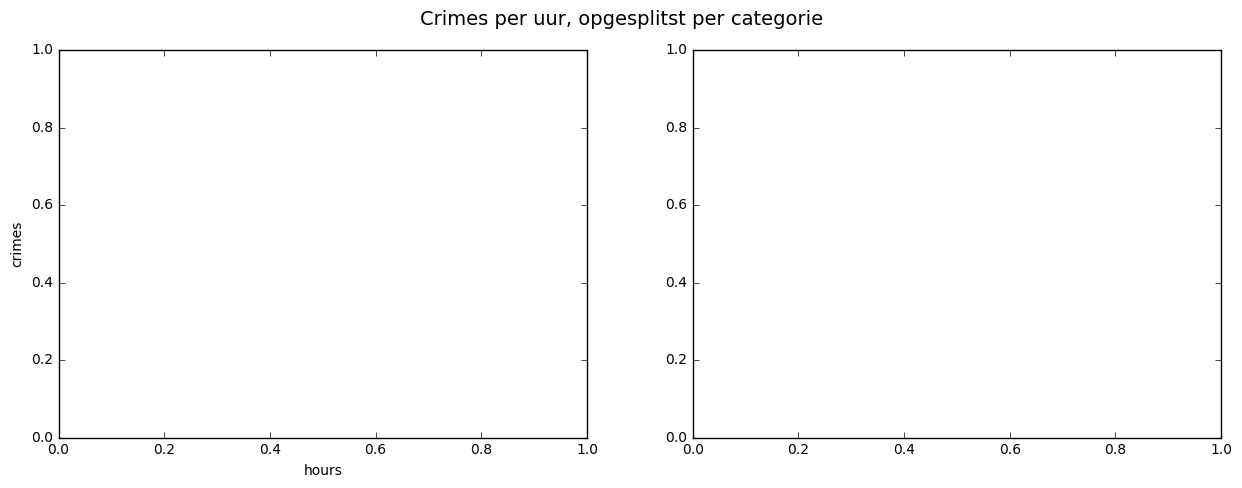

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis = range(0,24)
y_axis = []

fig = plt.figure(figsize=(15, 5))
plt1 = fig.add_subplot(121)
fig.suptitle('Crimes per uur, opgesplitst per categorie', fontsize=14)
plt1.set_xlabel('hours')
plt1.set_ylabel('crimes')
#plt1.plot(hours, traficCrimes)
plt2 = fig.add_subplot(122)
#plt2.plot(hours, statutoryCrimes)

In [ ]:
# # Create map
# person_crimes_data = key_crimes_data.filter(lambda x: x[0]=="personCrimes")
# person_crimes_data = person_crimes_data.map(lambda x: x[1][3])
# print person_crimes_data.collect()
# # print person_crimes_data.collect()[0][1][3]

In [ ]:
# from IPython.display import HTML
# import folium

# month = 9
# totals = make_station_data(MONTHS[month - 1])

# def create_map(m, height=650, title=''):
#     m._build_map()
#     srcdoc = m.HTML.replace('"', '&quot;')
#     embed = HTML(title + '<iframe srcdoc="{0}" '
#                  'style="width: 100%; height: {1}px; '
#                  'border: none"></iframe>'.format(srcdoc, height))
#     return embed

# m = folium.Map(location=[33.9522, -118.0598], zoom_start=11)
# sd = station_dict.value

# for i in range(0, 3):
#     try:
#         station = sd[int(total[0])]
#         if total[1] >= 0:
#             c = 'mediumseagreen'
#         else:
#             c = 'tomato'
#         r = 1
#         p = "personCrimes"
#         m.circle_marker(location=[lat[2], long[3]], radius=r,
#                     popup=p, line_color=c, fill_color=c)
#     except:
#         pass

# create_map(m)

In [5]:
personCrimesid = [52,231,230,624,622,623,860,840,870,235,627,813,237,922,812,110,930,943,753,886,434,111,830,940,236,626,763,250,251,821,845,810,815,850,910,882,884,435,820,933,625,888,756,113,121,932,762]
personCrimes = 0


for j in range(0, len(personCrimesid)):
    amount = year12.filter(lambda line: str(personCrimesid[j]) in line).count()
    print str(amount)
    personCrimes+= amount
    
print personCrimes

31833
3768
20618
21075
1778
2719
2635
2438
1545
5321
2407
3109
3749
2184
3065
17068
12282
2578
1661
1313
1588
12063
6413
2401
2498
11595
1548
4185
2917
1990
2330
3863
3581
2911
3322
959
1527
2187
3007
1694
1981
2637
1081
9100
118219
1803
1834
352380


In [14]:
propertyCrimesid = [648,480,487,942,949,662,664,310,330,654,
                    653,660,951,950,345,
                    444,668,670,349,347,924,331,
                    420,354,440,473,474,350,
                    341,647,470,471,740,745,510,442,
                    343,430,431,446,352,805,661,210,351,931]
# propertyCrimesid.sort()
# print propertyCrimesid
propertyCrimes = 0

for j in range(0, len(propertyCrimesid)):
    amount = year12.filter(lambda line: str(personCrimesid[j]) in line).count()
    print str(amount)
    propertyCrimes+= amount
    
print propertyCrimes

[210, 310, 330, 331, 341, 343, 345, 347, 349, 350, 351, 352, 354, 420, 430, 431, 440, 442, 444, 446, 470, 471, 473, 474, 480, 487, 510, 647, 648, 653, 654, 660, 661, 662, 664, 668, 670, 740, 745, 805, 924, 931, 942, 949, 950, 951]


In [ ]:
propertyCrimesid = [648,480,487,942,949,662,664,310,330,654,
                    653,660,951,950,345,
                    444,668,670,349,347,924,331,
                    420,354,440,473,474,350,
                    341,647,470,471,740,745,510,442,
                    343,430,431,446,352,805,661,210,351,931]
# propertyCrimesid.sort()
# print propertyCrimesid
propertyCrimes = 0

for j in range(0, len(propertyCrimesid)):
    amount = year12.filter(lambda line: str(personCrimesid[j]) in line).count()
    print str(amount)
    propertyCrimes+= amount
    
print propertyCrimes

In [ ]:
inchoateCrimesid = [220,485,761,666,320,410,944,954,445,421,450,441,475,520,443,920,452,436,451,122,928,930]
# inchoateCrimesid.sort()
# print propertyCrimesid
inchoateCrimes = 0

for j in range(0, len(inchoateCrimesid)):
    amount = year12.filter(lambda line: str(inchoateCrimesid[j]) in line).count()
    print str(amount)
    inchoateCrimes+= amount
    
print inchoateCrimes

In [18]:
statutoryCrimesid = [948,755,903,880,649,652,651,433,865,353,439,900,901,902,806,437,438,956,946,814,822]
# statutoryCrimesid.sort()
# print statutoryCrimesid
statutoryCrimes = 0

for j in range(0, len(statutoryCrimesid)):
    amount = year12.filter(lambda line: str(statutoryCrimesid[j]) in line).count()
    print str(amount)
    statutoryCrimes+= amount
    
print statutoryCrimes

[353, 433, 437, 438, 439, 649, 651, 652, 755, 806, 865, 880, 900, 901, 902, 903, 948]


In [ ]:
traficCrimesid = [997,890]
# statutoryCrimesid.sort()
# print statutoryCrimesid
traficCrimes = 0

for j in range(0, len(traficCrimesid)):
    amount = year12.filter(lambda line: str(traficCrimesid[j]) in line).count()
    print str(amount)
    traficCrimes+= amount
    
print traficCrimes